# Time Series Basics

## Correlated Stock Prices

You're interested in the performance of a particular stock. You use the [autocorrelation function](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.autocorr.html) in Pandas to assess how autocorrelated your stock's values are.

Autocorrelation makes explicit the idea of temporal correlation we discussed previously. Suppose we wanted to see how correlated a stock's prices are with the immediately preceding day's stock prices. 

| Day | Price | Price with Lag = 1 | Price with Lag = 2 |
|-----|-------|--------------------|--------------------|
| 1   | 25    | NA                 | NA                 |
| 2   | 26    | 25                 | NA                 |
| 3   | 28    | 26                 | 25                 |
| 4   | 24    | 28                 | 26                 |
| 5   | 23    | 24                 | 28                 |

Autocorrelation with a lag of 1 will calculate the correlation between column "Price" and column "Price with Lag = 1." Autocorrelation with a lag of $k$ will calculate the correlation between stock price and the stock price of $k$ days before in a similar manner.

I build a loop that iterates through days (we'll assume our stock price is the closing price at every day) 1 to 365 to assess how correlated a stock price is with the stock price from $i$ days ago. (Sample code seen below.)

```
for i in range(1, 366):
    print(df[stock_prices].autocorr(lag=i))
```

#### 1. Suppose my highest values of autocorrelation are found when $i = 1, 7, 30, 365$. What do each of these suggest about the performance of this particular stock?

> 1 suggests that the stock price are correlated daily ( the second day's stock price is correlated with the stock price one day before).

> 7 suggests that the stock price are correlated weekly.

> 30 suggests that the stock price are correlated monthly.

> 365 suggests that the stock price are correalted yearly

Stock prices vary quite rapidly. Looking at almost any plot of stock price over time, we'll see a very "wiggly" function that moves around erratically. Building a model for this can be difficult.

One way to "de-noise" or "smooth" this is to create a [moving average](http://www.investopedia.com/terms/m/movingaverage.asp) of stock prices. Suppose I wanted to create a moving average of stock prices across $k$ days. In this case, I create a new column that takes the current day and $k-1$ previous days (for $k$ total days) and average the stock prices of these days.

For example, I have a column of stock prices and a column associated with a moving average for three days. Then, my row for Day 5 includes the Day 5 stock price and the average of Day 3, Day 4, and Day 5 stock prices. 

| Day | Price | Moving Average k = 3 |
|-----|-------|----------------------|
| 1   | 25    | NA                   |
| 2   | 26    | NA                   |
| 3   | 28    | 26.33                |
| 4   | 24    | 26                   |
| 5   | 23    | 25                   |

#### 2.  As the number of periods $k$ increases, how do I expect my plotted curve to change?

* The plot mighe be smoother.

#### 3. Suppose we use our moving average to predict values of the stock price. As $k$ increases, how is the bias of our predictions affected? 

* Bia increases

#### 4. As $k$ increases, how is the variance of our predictions affected?

* Variance decreases

## Stock price exploration 

#### Using the `yfinance` package, download stock data from the past three years for a company you are interested in. 

In [74]:
import pandas as pd

In [19]:
import yfinance

aapl = yfinance.download('AAPL', start="2018-01-01", end='2020-12-31')

[*********************100%***********************]  1 of 1 completed


#### Examine the data.

In [3]:
aapl.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.310070,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.302879,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.494736,89738400


In [4]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2018-01-02 to 2020-12-30
Data columns (total 6 columns):
Open         755 non-null float64
High         755 non-null float64
Low          755 non-null float64
Close        755 non-null float64
Adj Close    755 non-null float64
Volume       755 non-null int64
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [5]:
aapl.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

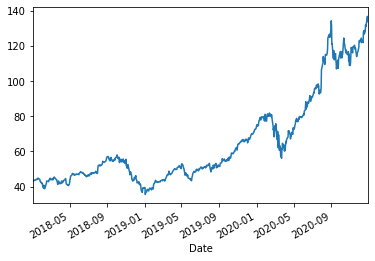

In [20]:
import matplotlib.pyplot as plt

aapl['Close'].plot()

#### We'll be working with the 'Adj Close' column. Rename that column 'price' and make your DataFrame just that column and the datetime index. 

In [21]:
aapl.rename({'Adj Close':'price'},axis=1,inplace=True)
aapl = aapl[['price']].copy()
aapl

,price
Date,
2018-01-02,41.310070
2018-01-03,41.302879
2018-01-04,41.494736
2018-01-05,41.967163
2018-01-08,41.811283
...,...
2020-12-23,130.542862
2020-12-24,131.549637
2020-12-28,136.254608


#### Make a column that is the `price` of the previous day.

In [22]:
aapl.loc[:,'price_1'] = aapl['price'].shift(1).copy()

In [27]:
aapl.dropna(inplace=True)

In [28]:
aapl.head(3)

,price,price_1
Date,,
2018-01-03,41.302879,41.310070
2018-01-04,41.494736,41.302879
2018-01-05,41.967163,41.494736


#### Split the DataFrame into training and test sets so that the test set is the most recent year of data (you can use pandas slicing, scikit-learn, or sktime packages to do this).

In [60]:
train = aapl[:'2019']
test = aapl['2020':]

#### Plot the stock price with different colors for the training and test sets.

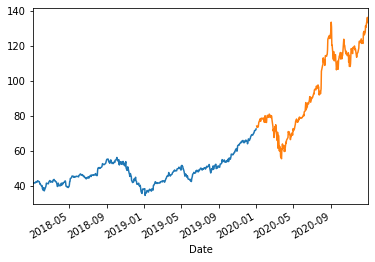

In [34]:
train['price'].plot();
test['price'].plot();

#### Find the autocorrelation of the training data.

In [35]:
train['price'].autocorr()

0.9943926914917319

#### Plot the autocorrelation using statsmodels `plot_acf`.

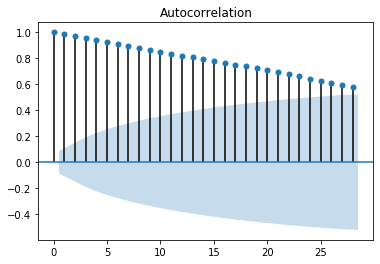

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train['price']);

#### Plot the partial autocorrelation values using statsmodels `plot_pacf`.

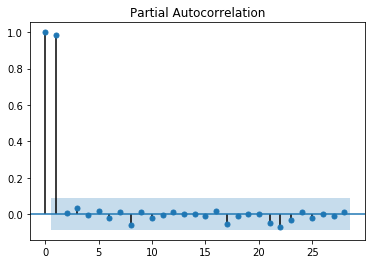

In [37]:
plot_pacf(train['price']);

#### Do any values show high autocorrelation?

* Day 1 and Day 2

#### Make a baseline model that is just the last value from the training set.

In [39]:
baseline = train['price'][-1]
baseline

72.55209350585938

#### Score it on the test set using MAE

In [43]:
import numpy as np
preds_base = np.array([baseline] * len(test))
score_base = np.mean(abs(test['price'] - preds_base))
score_base

24.335300218491327

#### Using scikit-learn's LinearRegression class, make a model to predict the stock price based on the stock price from the day before. This is a very basic model that doesn't consider trend or seasonality.

In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train[['price_1']], train['price'])

LinearRegression()

#### Predict, plot, and score on MAE.

In [61]:
preds_lr = lr.predict(test[['price_1']])

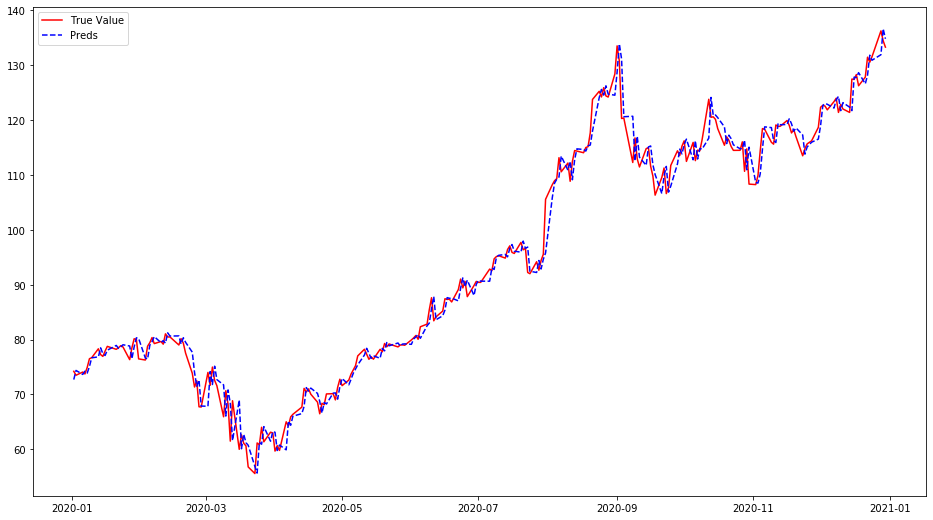

In [93]:
plt.figure(figsize=(16,9))
plt.plot_date(test.index, test['price'], label = 'True Value', color = 'red', fmt = '-');
plt.plot_date(test.index, preds_lr, label = 'Preds', color = 'blue', fmt = '--');
plt.legend();

#### How does the model do?

Looks pretty good.

#### Congratulations! You just made an autoregression model (AR)! 🎉